In [4]:
import pandas as pd
import numpy as np
import os

In [6]:
def convert_excel_to_csv(folder_path, output_csv_path):
    dfs = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    
    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df.to_csv(output_csv_path, index=False)

folder_path = 'Data'
output_csv_path = 'output.csv'

convert_excel_to_csv(folder_path, output_csv_path)


In [63]:
df = pd.read_csv('output.csv')

In [64]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",NaN


#### Droping 'image' and 'link' columns, because they may not be able to help us in analysis

In [65]:
df.drop(columns=['image', 'link'], inplace=True)

In [66]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990",NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990",NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990",NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990",NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790",NaN


In [67]:
df.sample(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
566298,DIMPY GARMENTS Solid Plus Size Women Denim Jacket,women's clothing,Western Wear,NaN,NaN,₹599,"₹1,499",8377.0
605696,"DSR"" Keyrings & Keychains Doll Pendant Cute Ca...",accessories,Bags & Luggage,4.4,32,₹449,"₹1,999",NaN
234387,Avsar 14k (585) Yellow Gold Ring for Women,accessories,Gold & Diamond Jewellery,NaN,NaN,"₹18,083","₹43,884",10759.0
730642,New Police Oxford Derby Lace-up Formal Uniform...,men's shoes,Formal Shoes,NaN,NaN,₹499,₹999,NaN
59557,"Baby Girl Hair Accessories Set Baby Head Band,...",kids' fashion,Baby Fashion,NaN,NaN,₹199,₹450,661.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   ratings         751582 non-null   object 
 4   no_of_ratings   751582 non-null   object 
 5   discount_price  980844 non-null   object 
 6   actual_price    1067544 non-null  object 
 7   Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(7)
memory usage: 67.3+ MB


In [69]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [70]:
df.describe()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
count,1103170,1103170,1103170,751582,751582,980844,1067544
unique,396210,20,112,49,8342,27511,23170
top,Zeya Yellow Gold Ring,accessories,Shirts,4.0,1,₹499,₹999
freq,1436,232282,38400,73218,79632,36496,97548


In [73]:
df['discount_price'] = df['discount_price'].apply(lambda x: x[1:] if pd.notnull(x) else x)

In [75]:
df['actual_price'] = df['actual_price'].apply(lambda x: x[1:] if pd.notnull(x) else x)

In [76]:
df.sample(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
1049713,Levi's Men's Regular Fit T-Shirt,men's clothing,T-shirts & Polos,NaN,NaN,"1,025","1,799"
732327,HiREL'S Men's Tan Leather Slip On Formal Shoes,men's shoes,Formal Shoes,3.0,1,"1,500","3,500"
997462,Shopnet Wireless Bluetooth Speaker TG113 For L...,"tv, audio & cameras",Speakers,NaN,NaN,999,"1,599"
664277,Qeboo Collection Women Jeans High Waist Ankle ...,women's clothing,Clothing,5.0,2,695,"1,499"
436565,IMPACT BY HONEYWELL 2 MP CCTV KIT Without DVR ...,"tv, audio & cameras",Security Cameras,NaN,NaN,"13,999","36,220"


In [77]:
df['discount_price'] = df['discount_price'].str.replace(',','')
df['actual_price'] = df['actual_price'].str.replace(',','')

In [78]:
df.sample(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
58349,SYGA Baby Girls Nylon Headbands Hairbands Hair...,toys & baby products,"Baby Bath, Skin & Grooming",4.4,10,199,499
247866,ZOUK Women's Handmade Vegan Leather and Jute P...,accessories,Handbags & Clutches,4.0,21,899,2198
758169,Avsar 14k (585) Yellow Gold Pendant for Women,accessories,Gold & Diamond Jewellery,NaN,NaN,7707,18432
462083,blackberrys Men's Skinny Fit Shirt,men's clothing,Shirts,NaN,NaN,1209,2599
225977,Avsar Real Gold 14K RING AVR372YB,accessories,Gold & Diamond Jewellery,NaN,NaN,10755,21511


In [79]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

In [80]:
df.sample(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
799920,Orpat 2000 Watt Element Heater Fan Heater Room...,appliances,Heating & Cooling Appliances,4.2,54.0,1210.0,1295.0
603360,Baggit Women's Sling Bag - Medium,accessories,Bags & Luggage,NaN,NaN,1512.0,1890.0
682738,Sangam Prints Women's Pashmina Printed Saree w...,women's clothing,Ethnic Wear,4.0,6.0,899.0,3440.0
21107,Spigen Thin Fit Back Cover Case Compatible for...,"tv, audio & cameras",All Electronics,4.4,297.0,1299.0,1699.0
624773,FND UV Filter 49MM Replacement for Canon EOS M...,"tv, audio & cameras",Cameras,4.0,1.0,799.0,899.0


In [81]:
df.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           364054
no_of_ratings     425112
discount_price    122326
actual_price       35626
dtype: int64

#### List of unique main categories

In [84]:
df['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

#### List of unique sub categories

In [85]:
df['sub_category'].unique()

array(['Air Conditioners', 'All Appliances',
       'All Car & Motorbike Products', 'All Electronics',
       'All Exercise & Fitness', 'All Grocery & Gourmet Foods',
       'All Home & Kitchen', 'All Pet Supplies',
       'All Sports, Fitness & Outdoors', 'Amazon Fashion',
       'Baby Bath, Skin & Grooming', 'Baby Fashion', 'Baby Products',
       'Backpacks', 'Badminton', 'Bags & Luggage', 'Ballerinas',
       'Beauty & Grooming', 'Bedroom Linen', 'Camera Accessories',
       'Cameras', 'Camping & Hiking', 'Car & Bike Care',
       'Car Accessories', 'Car Electronics', 'Car Parts',
       'Cardio Equipment', 'Casual Shoes', 'Clothing',
       'Coffee, Tea & Beverages', 'Cricket', 'Cycling', 'Diapers',
       'Diet & Nutrition', 'Dog supplies', 'Ethnic Wear',
       'Fashion & Silver Jewellery', 'Fashion Sales & Deals',
       'Fashion Sandals', 'Fitness Accessories', 'Football',
       'Formal Shoes', 'Furniture', 'Garden & Outdoors',
       'Gold & Diamond Jewellery', 'Handbags & C

### Q.1: Number of items available with discount?

In [89]:
df.info()
# Non null rows: 980844

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   ratings         739116 non-null   float64
 4   no_of_ratings   678058 non-null   float64
 5   discount_price  980844 non-null   float64
 6   actual_price    1067544 non-null  float64
dtypes: float64(4), object(3)
memory usage: 58.9+ MB


In [93]:
items_with_discount = df[df['discount_price'] < df['actual_price']]

In [92]:
(df['discount_price'] < df['actual_price']).sum()
#Answer:980844

980844

#### There can be some condition where discounted price might be high than actual price and we can not include them in discounted items so, we inspected if that is case or not?

In [95]:
df.sample(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
125685,"Sapatos Men Casual Clogs, Ideal for Men (ST-6262)",men's shoes,Casual Shoes,2.4,6.0,599.0,999.0
87098,Dealsure Professionals Design Perfect Shaver A...,beauty & health,Beauty & Grooming,3.4,9.0,775.0,3999.0
305942,Sexy Beast Basics Cotton Boxer Shorts for Men ...,men's clothing,Innerwear,NaN,NaN,399.0,599.0
232801,PC Jeweller 22k (916) Yellow Gold Ring for Women,accessories,Gold & Diamond Jewellery,NaN,NaN,41670.0,49359.0
128750,Men Side Chain Boots,men's shoes,Casual Shoes,NaN,NaN,799.0,2999.0


### Q.2: Items available for mens?

In [104]:
items_available_for_men = df[df['name'].str.split(' ').apply(lambda x: True if 'Men' in x else False)]

In [105]:
items_available_for_men.shape[0]
#Answer: 116842

116842

In [173]:
items_available_for_women = df[df['name'].str.split(' ').apply(lambda x: True if 'Women' in x else False)]
items_available_for_women.shape[0]

140974

### Q.3: What are the average ratings across different product categories?

In [129]:
avg_rating_by_main_category = df.groupby([df['main_category'],df['sub_category']])['ratings'].mean().sort_values(ascending=False)
avg_rating_by_main_category

main_category            sub_category               
toys & baby products     International Toy Store        4.578947
beauty & health          Value Bazaar                   4.304545
grocery & gourmet foods  All Grocery & Gourmet Foods    4.176296
beauty & health          Health & Personal Care         4.174317
toys & baby products     Strollers & Prams              4.127092
                                                          ...   
tv, audio & cameras      Headphones                     3.503177
car & motorbike          Car Electronics                3.497718
beauty & health          Personal Care Appliances       3.455056
tv, audio & cameras      Security Cameras               3.319143
home, kitchen, pets      Refurbished & Open Box         3.135000
Name: ratings, Length: 112, dtype: float64

In [130]:
avg_rating_by_sub_category = df.groupby(df['main_category'])['ratings'].mean().sort_values(ascending=False)
avg_rating_by_sub_category

main_category
grocery & gourmet foods    4.072739
toys & baby products       4.030417
pet supplies               4.029325
beauty & health            4.002085
home & kitchen             3.977118
music                      3.964741
stores                     3.946108
bags & luggage             3.939759
accessories                3.904224
kids' fashion              3.861064
appliances                 3.840975
industrial supplies        3.840392
tv, audio & cameras        3.825332
sports & fitness           3.805097
women's clothing           3.766114
men's clothing             3.765749
car & motorbike            3.727236
women's shoes              3.678979
men's shoes                3.638153
home, kitchen, pets        3.135000
Name: ratings, dtype: float64

### Q.4: Which products have the highest customer satisfaction (ratings) and why?

In [132]:
df.sample(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
19019,TheGiftKart Back Cover Soft Case for Samsung G...,"tv, audio & cameras",All Electronics,4.3,63.0,265.0,999.0
215953,Wolven Handcrafted Men's Morgan red & Black Le...,men's shoes,Formal Shoes,NaN,NaN,1999.0,4999.0
283416,"DOJI 14 LED 3 Meter Fairy String Lights,Plug i...",home & kitchen,Home Décor,4.4,4.0,299.0,399.0
526333,Uniplanet Store Women Uchiha Naruto Round Neck...,men's clothing,T-shirts & Polos,NaN,NaN,275.0,899.0
575111,Mode By Red Tape Women's Regular Tops (MFB0011...,women's clothing,Western Wear,4.0,3.0,430.0,2399.0


In [171]:
all_products = df[df['no_of_ratings'] > 500].groupby('name').mean()
all_products['ratings'].sort_values(ascending=False)

C:\Users\Prasa\AppData\Local\Temp\ipykernel_16952\3755707925.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_products = df[df['no_of_ratings'] > 500].groupby('name').mean()


name
Sennheiser E609 Instrument Microphone-Silver Super Cardioid handles high SPL designed for Guitar, Sound Reinforcement, Stu...    4.9
EPISKEY® Scalp Massager Shampoo Brush, Eco-friendly Wheat Straw body with Soft Silicon Bristles, Hair Scalp Scrubber, Scal...    4.8
Shnuggle Baby Bath with Plug & Foam Backrest- White & Pink                                                                       4.8
Hawk: The Church Series: 1                                                                                                       4.8
crocs Unisex-Child Crocband Mickey Fnlb Lights K Clogs                                                                           4.8
                                                                                                                                ... 
BEONZA Men Latest Flip Flop Slides Slippers                                                                                      2.7
KANTA Hot Thread Kitchen Runner Floor Mat & Runner With Runner S

In [172]:
top_product = all_products['ratings'].sort_values(ascending=False).head(1)
top_product

name
Sennheiser E609 Instrument Microphone-Silver Super Cardioid handles high SPL designed for Guitar, Sound Reinforcement, Stu...    4.9
Name: ratings, dtype: float64

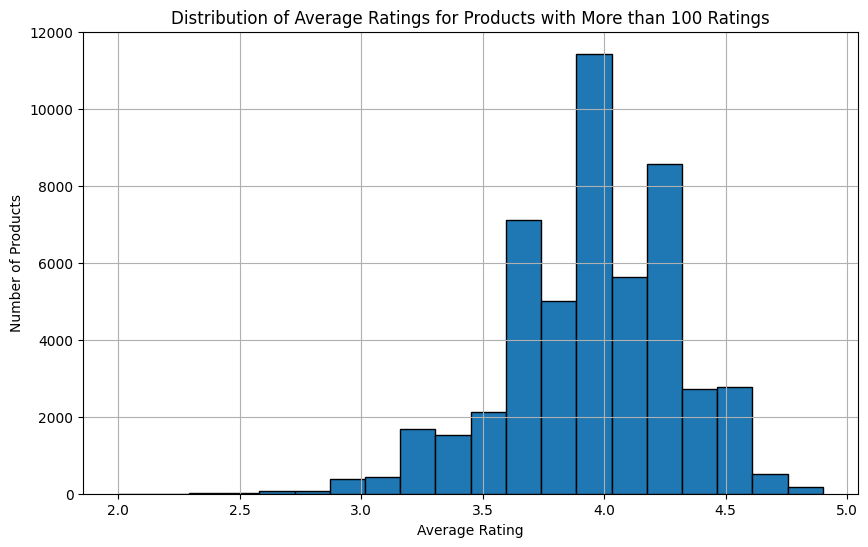

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
all_products['ratings'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Average Ratings for Products with More than 100 Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Products')
plt.show()


#### Why? May be many of guitarist buy products online and product provided is better quality with cost effectivness

### Graphs

#### 1. Bar Chart of Average Ratings by Category

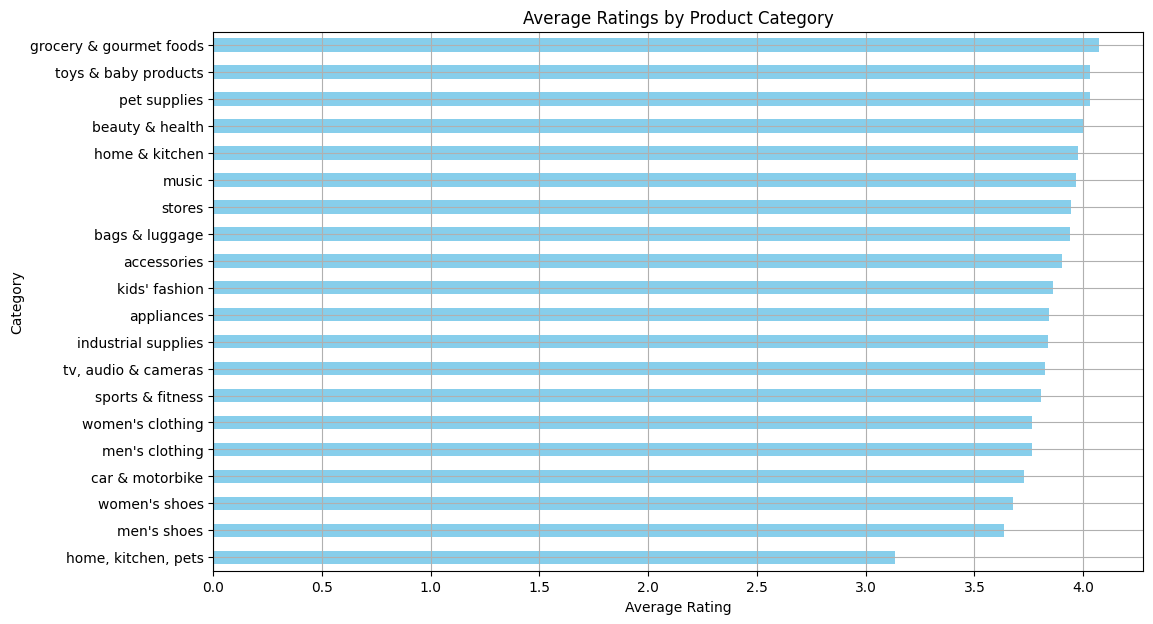

In [174]:
average_ratings = df.groupby('main_category')['ratings'].mean().sort_values()

plt.figure(figsize=(12, 7))
average_ratings.plot(kind='barh', color='skyblue')
plt.title('Average Ratings by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.grid(True)
plt.show()


#### 2. Box Plot of Ratings by Category

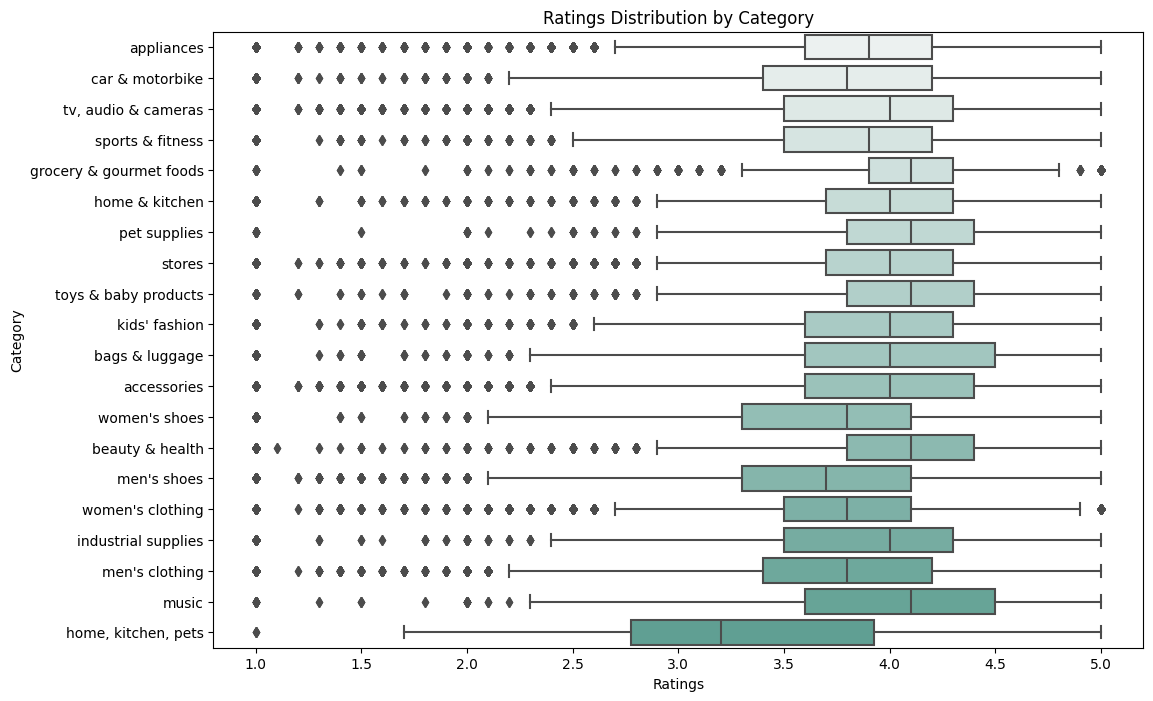

In [175]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='ratings', y='main_category', data=df, palette="light:#5A9")
plt.title('Ratings Distribution by Category')
plt.xlabel('Ratings')
plt.ylabel('Category')
plt.show()
